Load and parse the Dataset (Run this first!)

Update the directory which contains all xlsx files

In [9]:
from ParseData import parse_dataset
from utils.PropertyNames import ColumnNames as Cols

patient_data = parse_dataset("/path/to/dataset/", silent=False)
patients = patient_data[Cols.patient].unique()


Data Loaded!


Plot Probability Distribution

Resulting graph: ProbabilityGraph with 805 nodes and 2293 edges


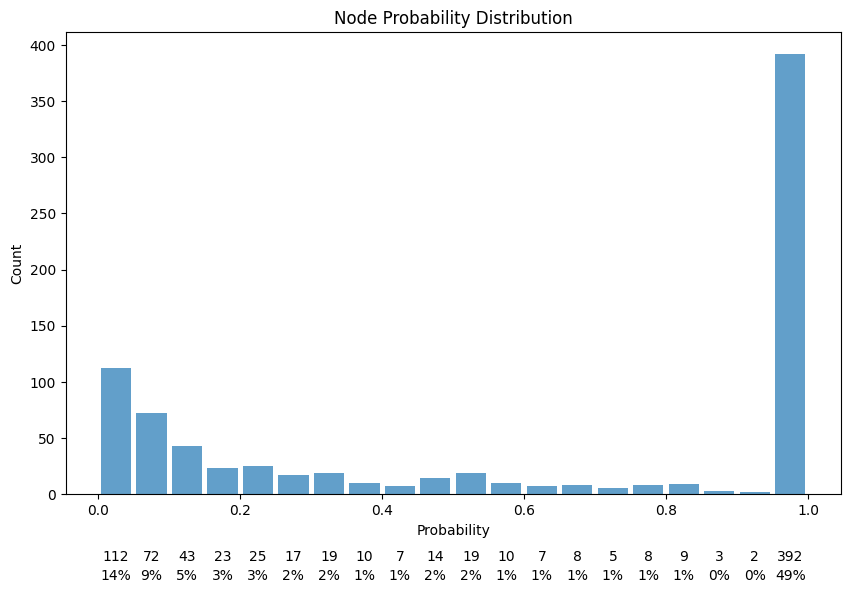

In [2]:
from utils.VisualizationUtils import draw_histogram
from deBruijn.ProbabilityGraph import ProbabilityGraph
from utils.PropertyNames import MethodOptions as Opts
from utils.PropertyNames import ColumnNames as Cols

k = 4
risky_chars: None
params = {
    "prune": False,
    "prune_method": Opts.filter,
    "prune_threshold": 3,
    "max_steps": 3,
}

sequences = []
for p in patients:
    float_seq = patient_data[patient_data[Cols.patient] == p]
    float_seq = float_seq.sort_values(Cols.date, ascending=True)[Cols.char]
    sequences.append(float_seq)

probability_graph = ProbabilityGraph(sequences=sequences, k=k)

print(f"Resulting graph: {probability_graph}")

probability_model = probability_graph.get_probability_model(**params)

draw_histogram(list(probability_model.probability_dict.values()), "Node Probability Distribution", "Probability",
               "Count", bins=20)


Sample Benchmark Test

In [3]:
from utils.PropertyNames import MethodOptions as Opts
from Benchmark import benchmark

params = {
    "k": 4,
    "risky_chars": None,
    "risk_threshold": 0.5,
    "prune": True,
    "prune_method": Opts.filter,
    "prune_threshold": 3,
    "max_steps": 3,
    "naive_threshold": 20
}

benchmark(patient_data, start_time_range_hours=0, end_time_range_hours=1, **params)


,Alert Type,Accuracy,Precision,Sensitivity,Specificity,F1 Score,Skipped Data
0,Probabilistic_Alert,0.738509,0.393635,0.386230,0.827226,0.385098,179/22291
1,Naive_Alert,0.793998,0.536278,0.426622,0.904407,0.450153,150/22291
2,Combined_Alert,0.805859,0.679398,0.222395,0.975125,0.328538,150/22291


Plot Timelines using combined_alert for every point. Alerted datapoints are marked as red

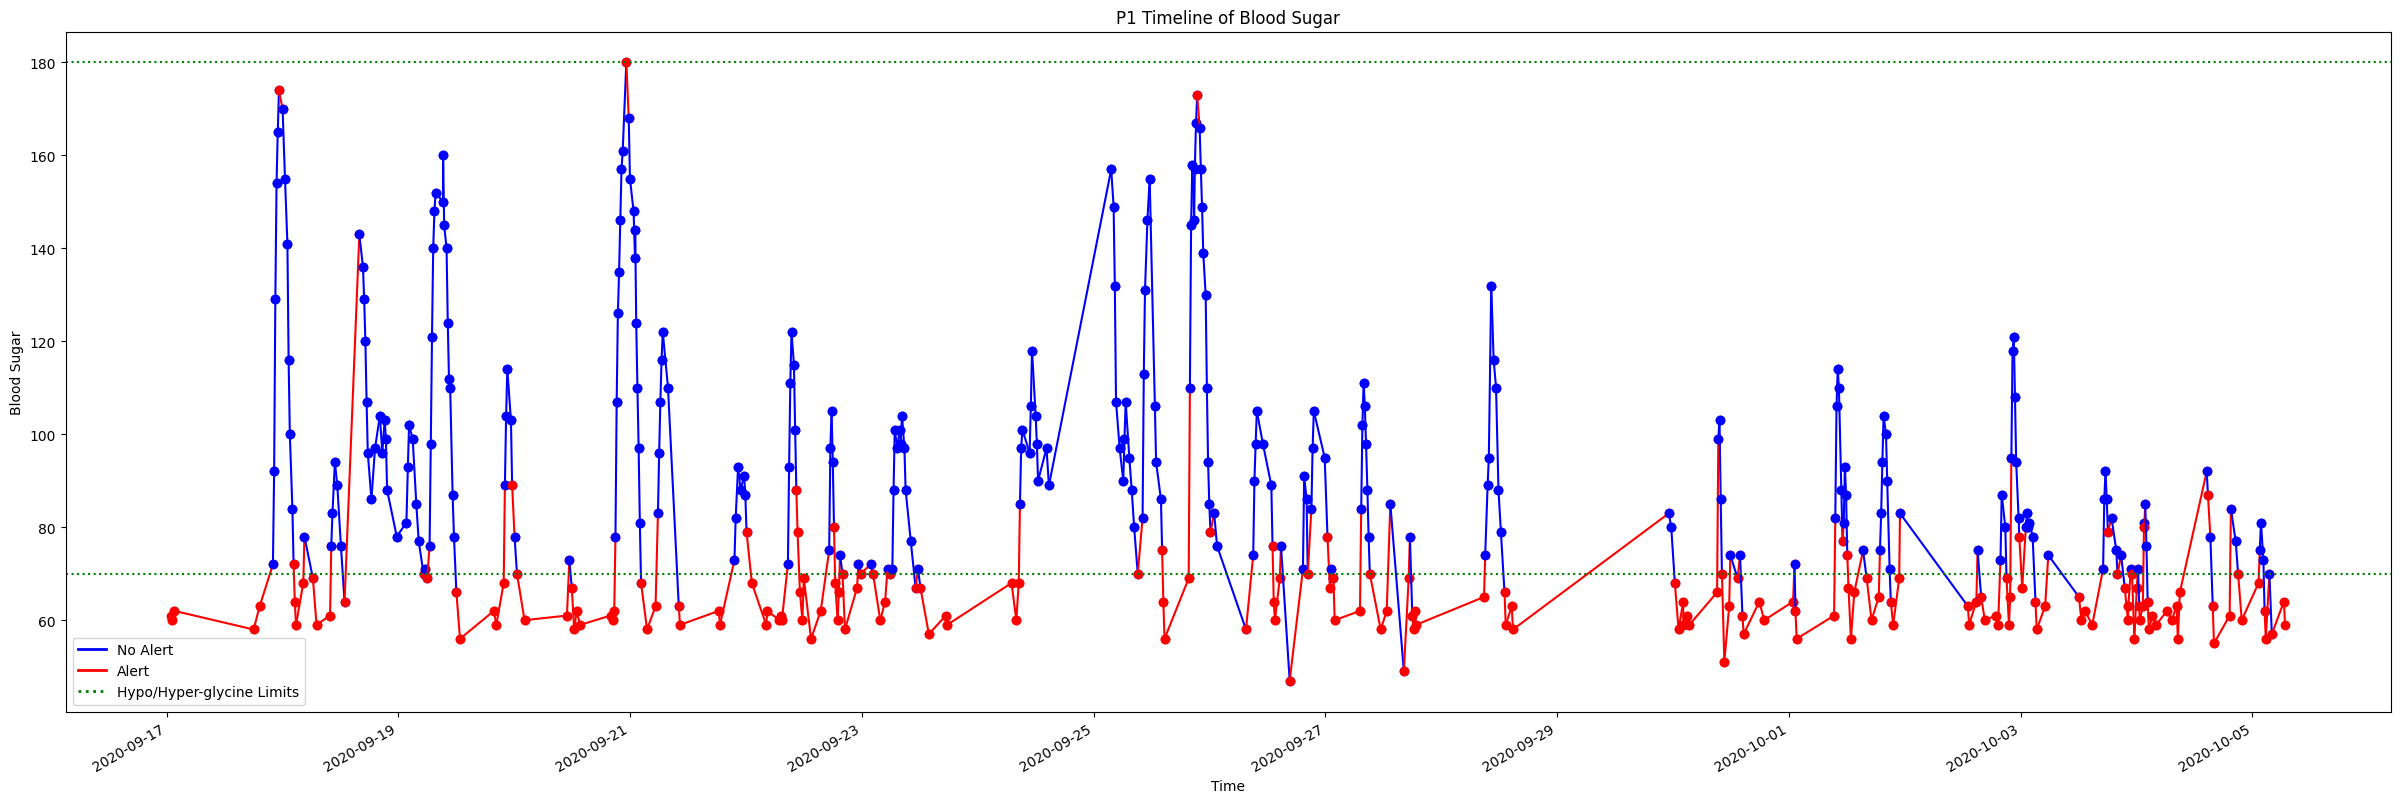

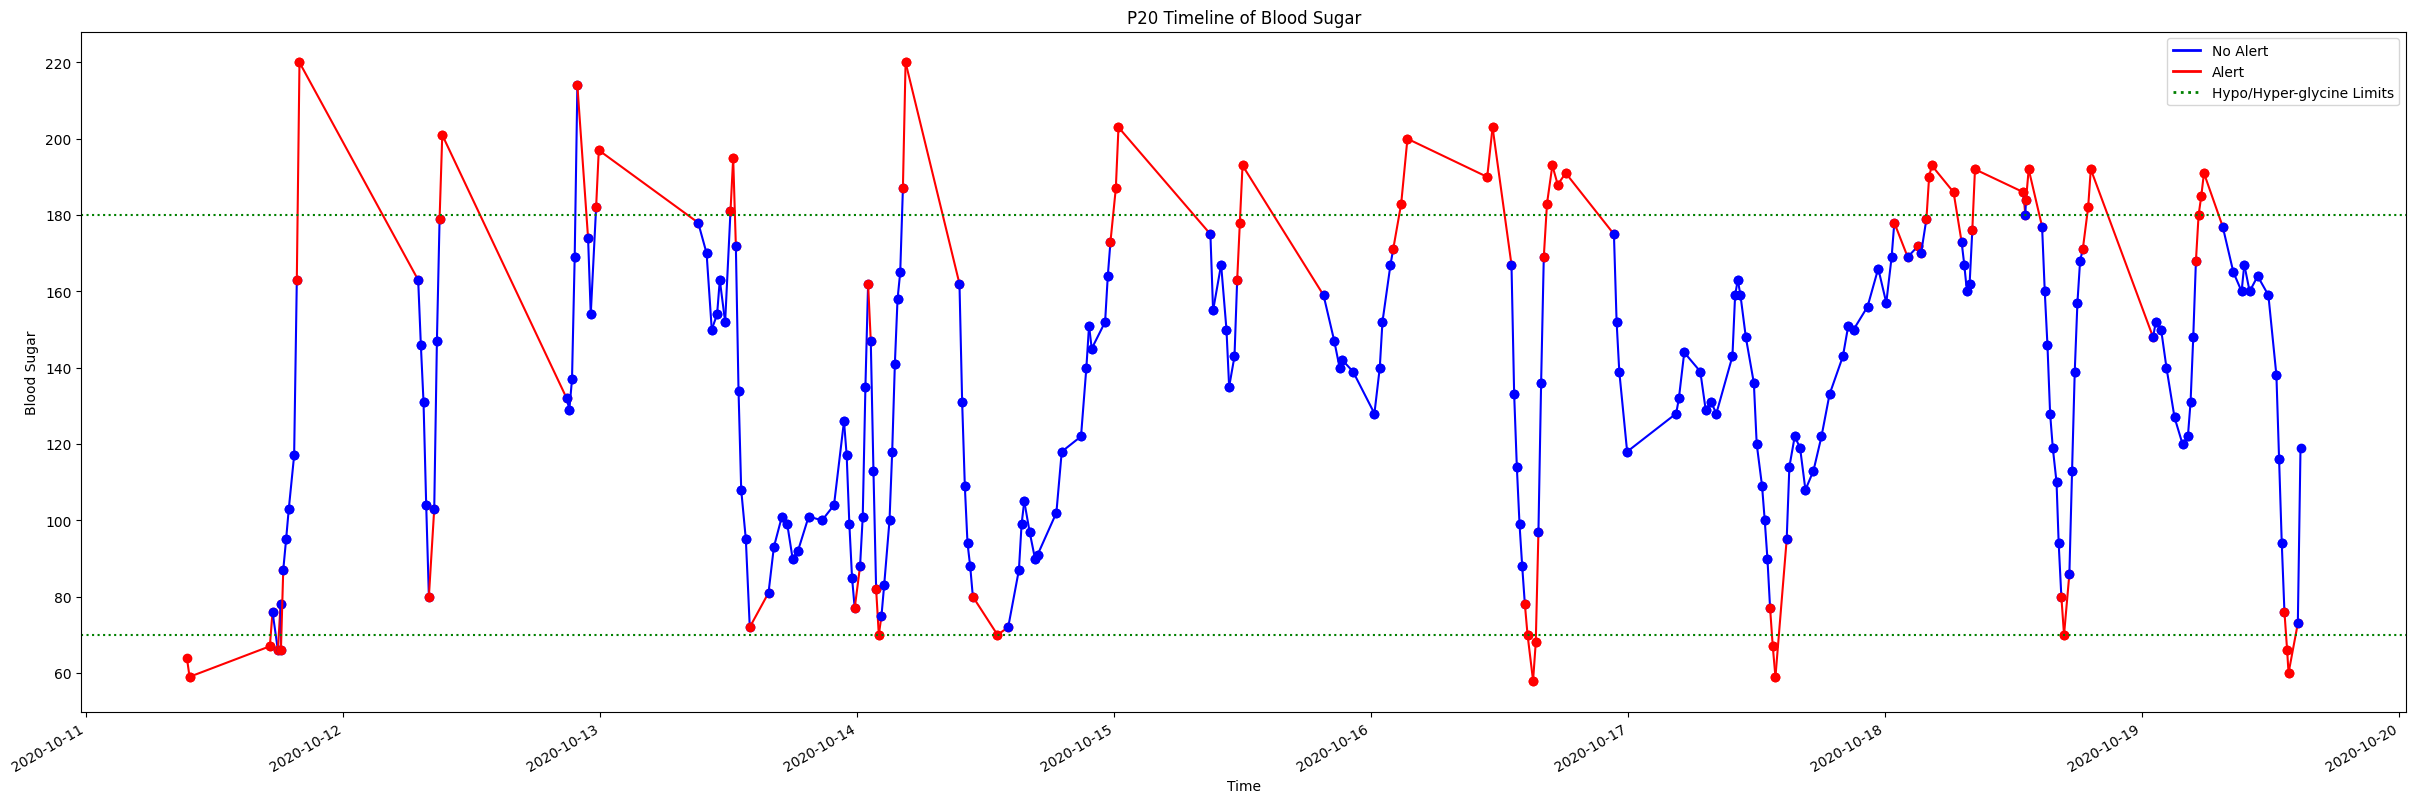

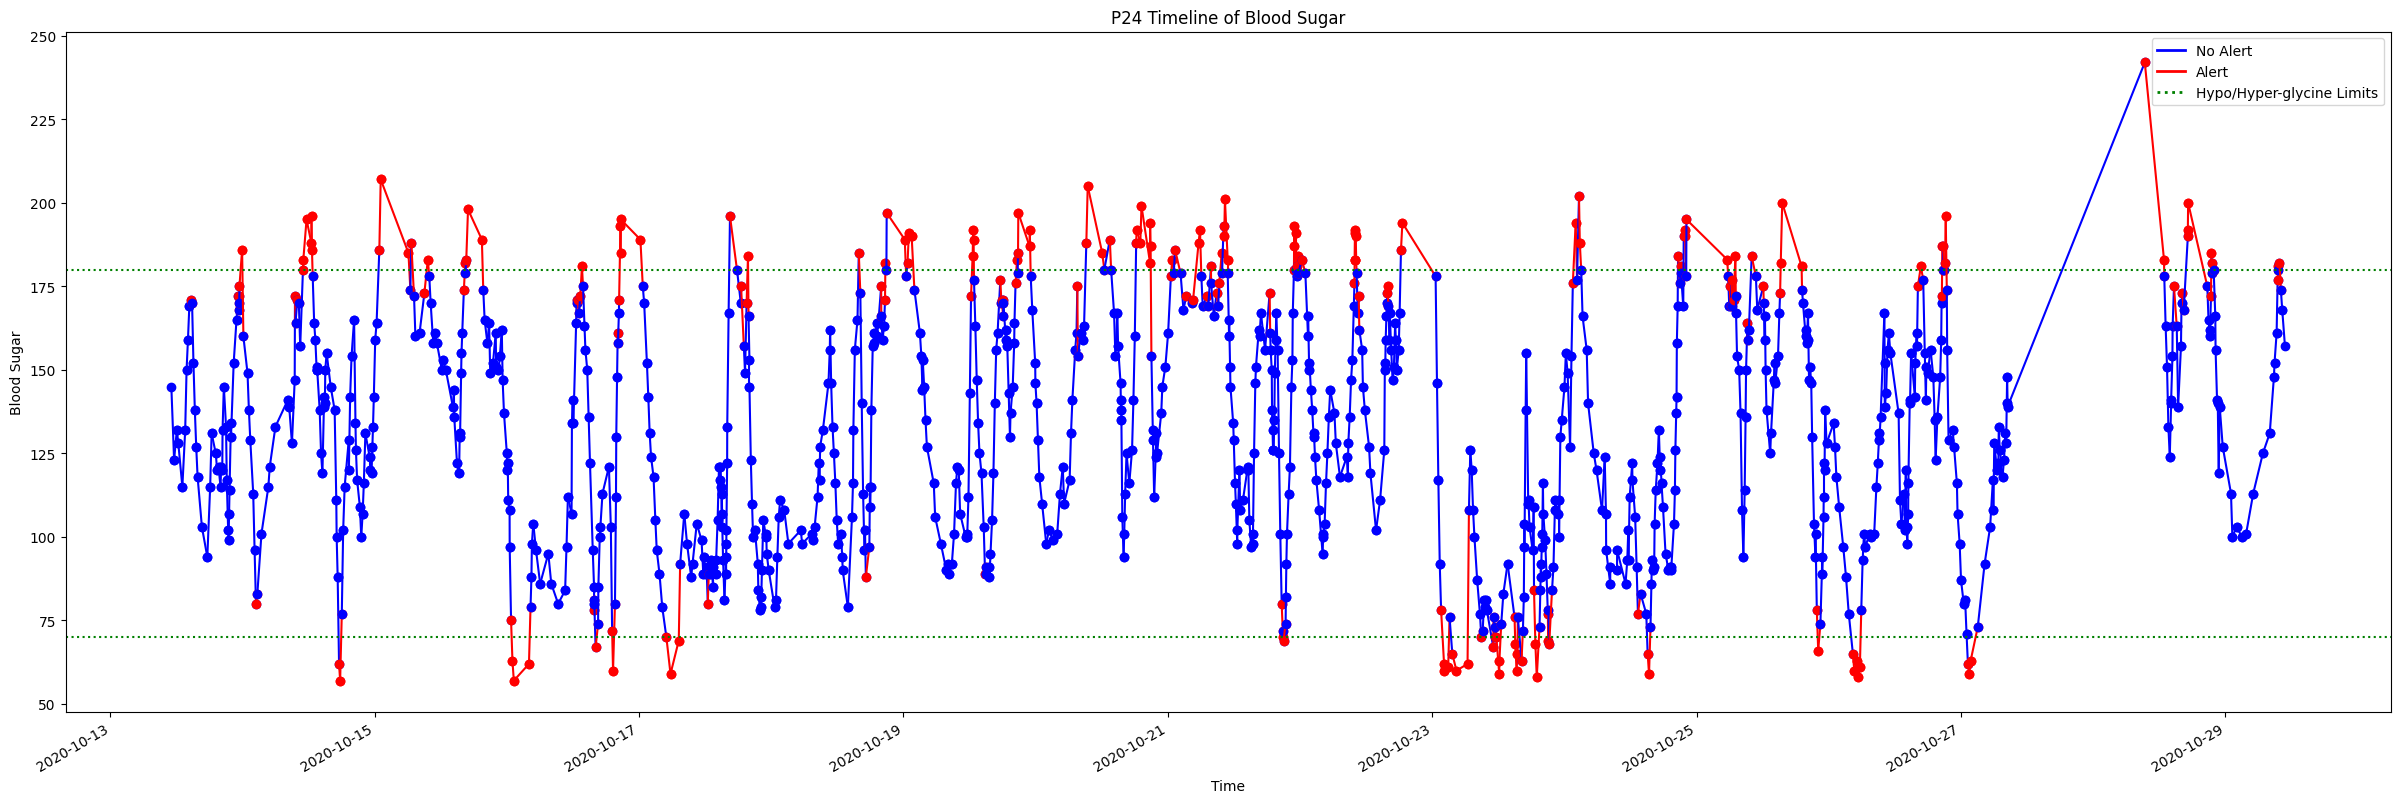

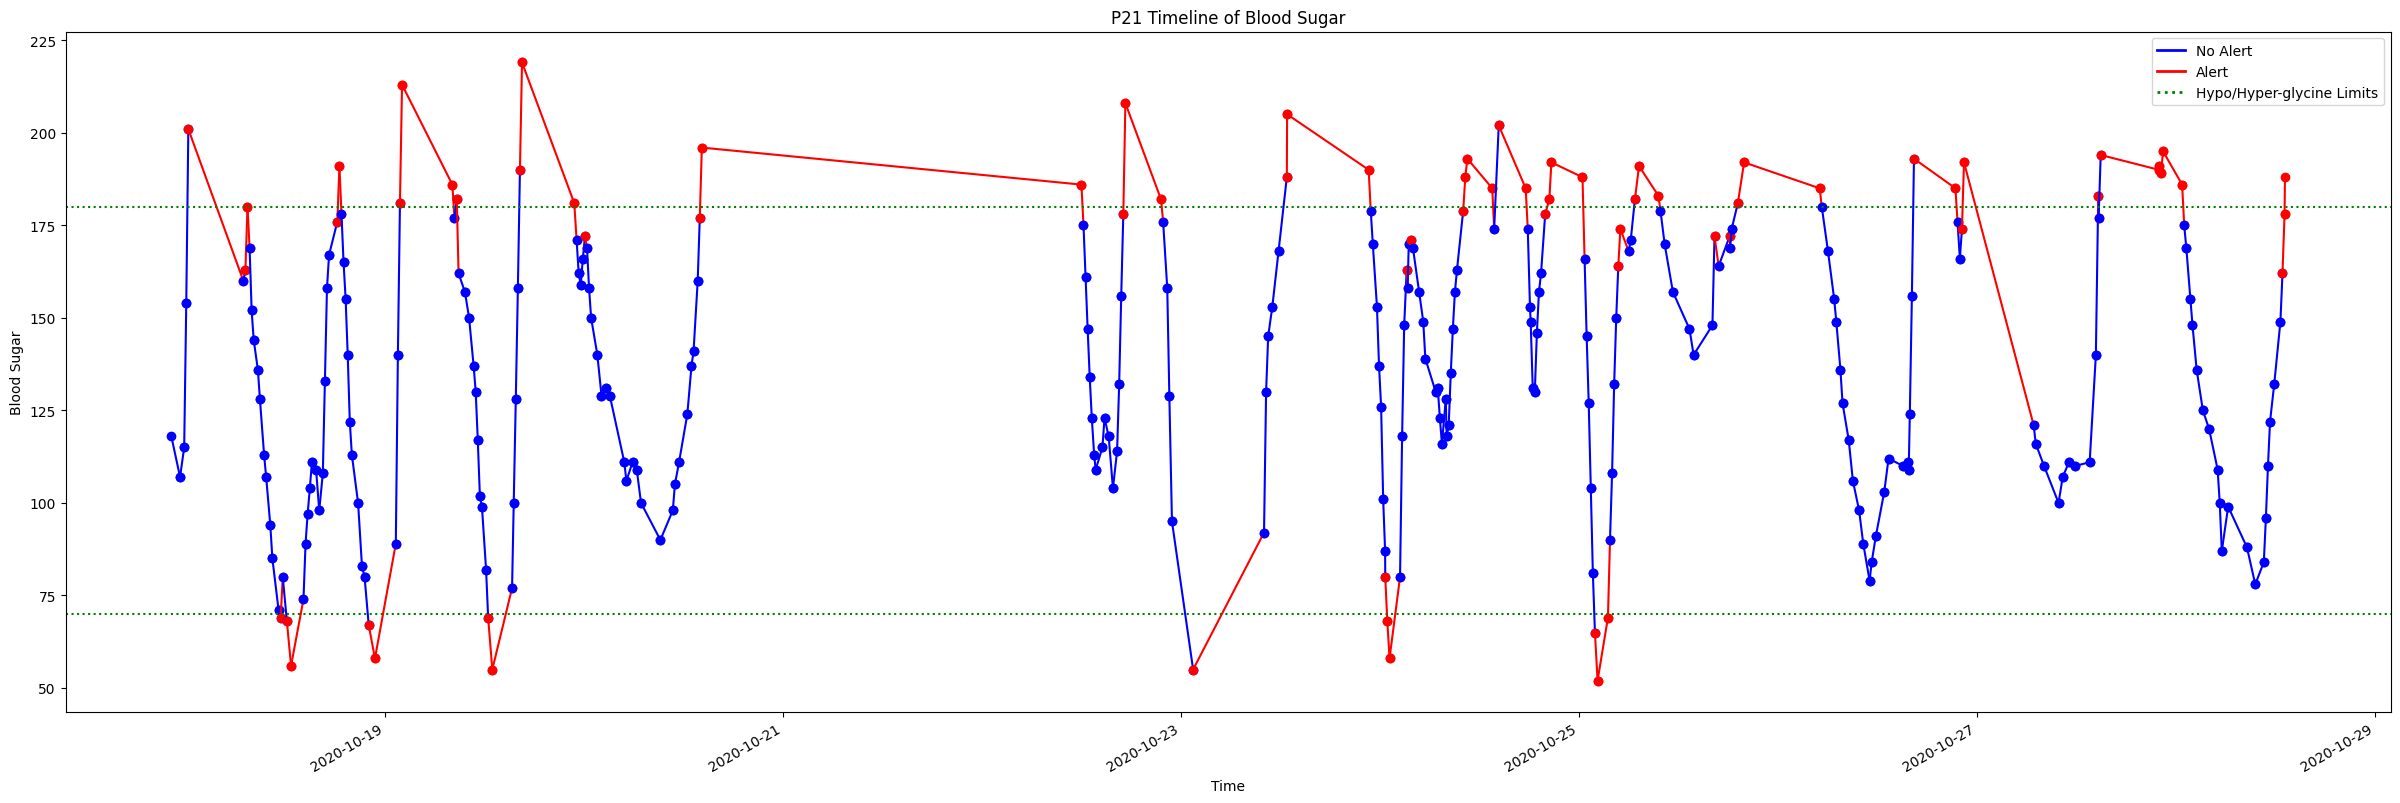

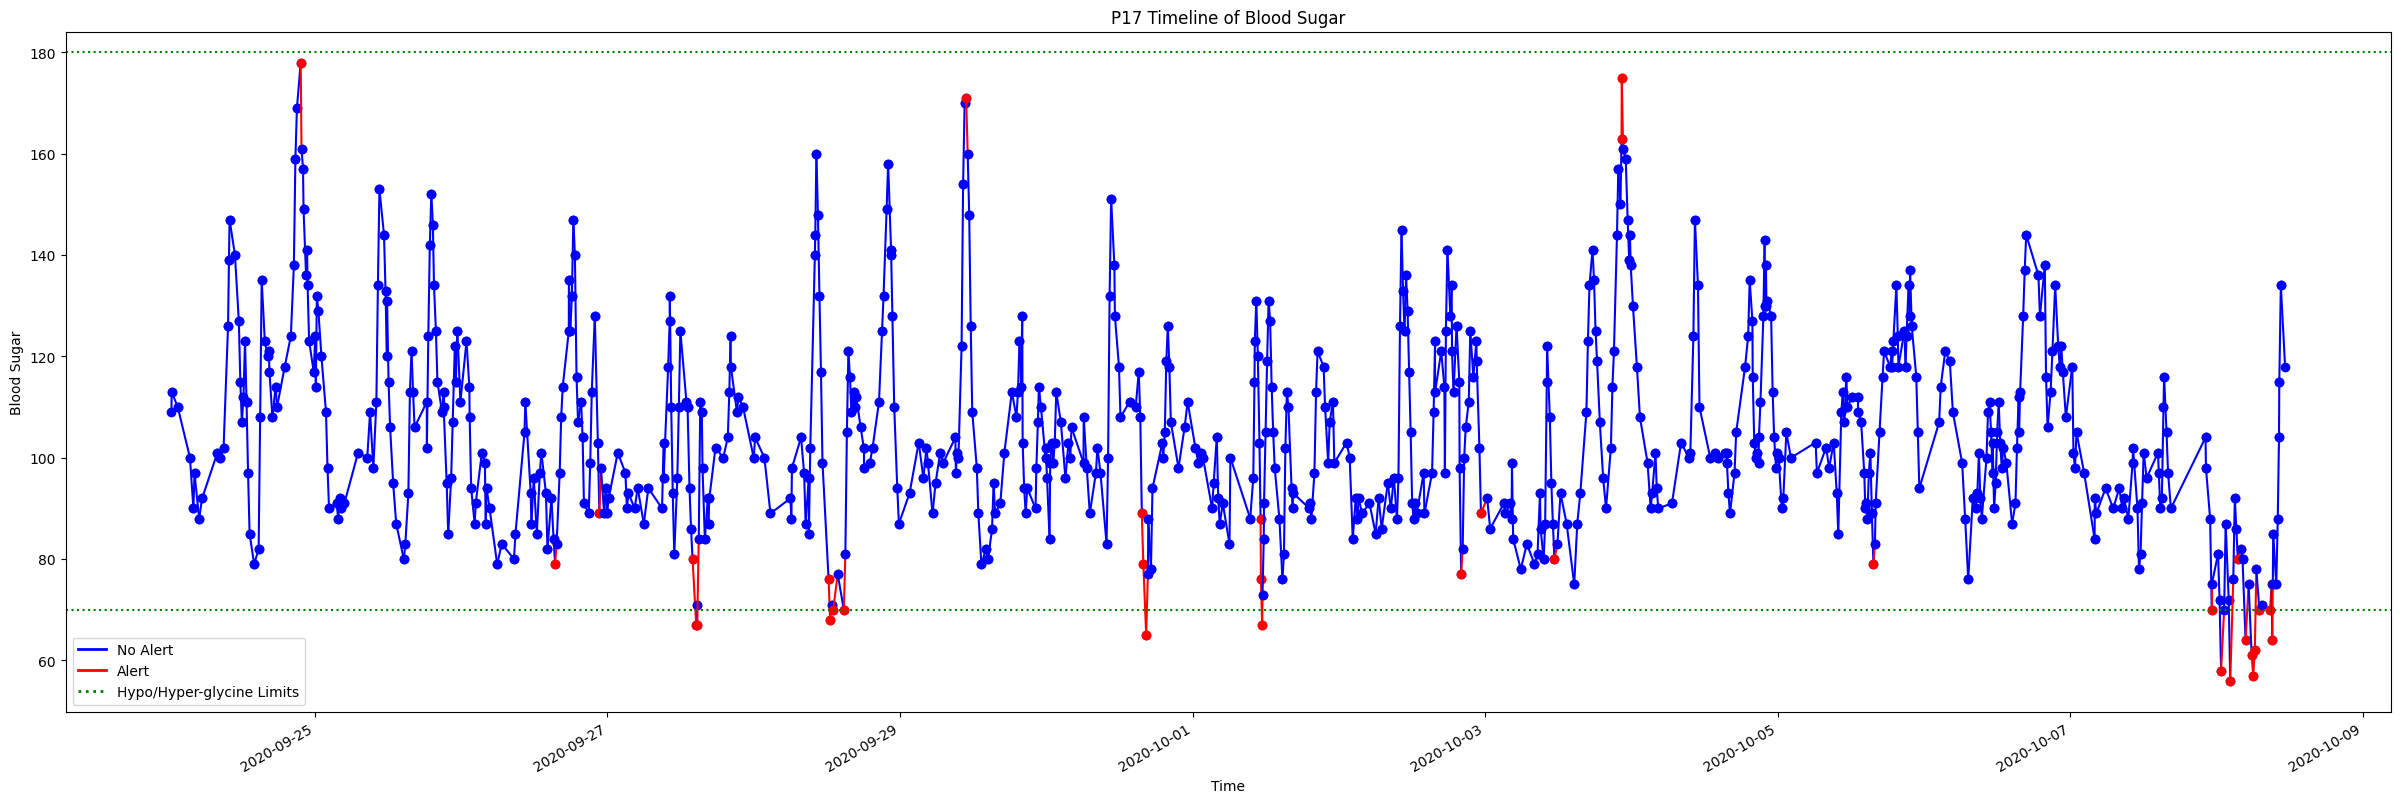

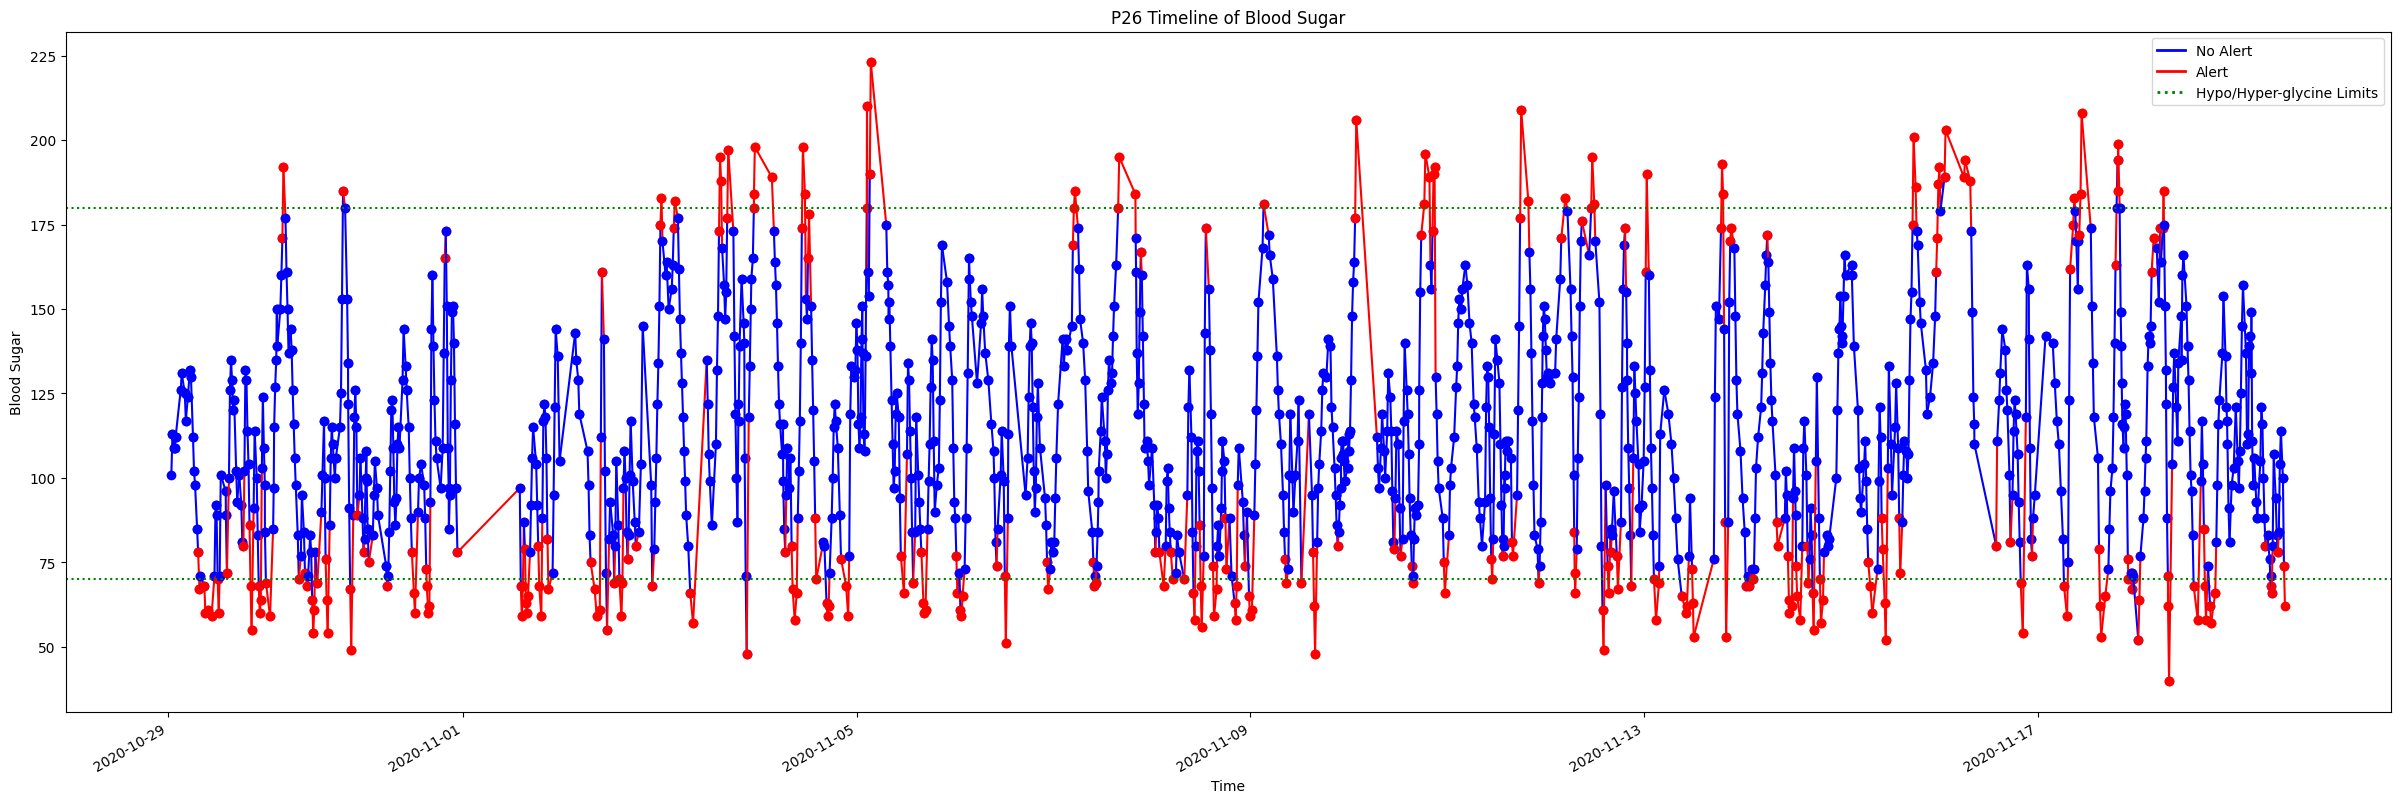

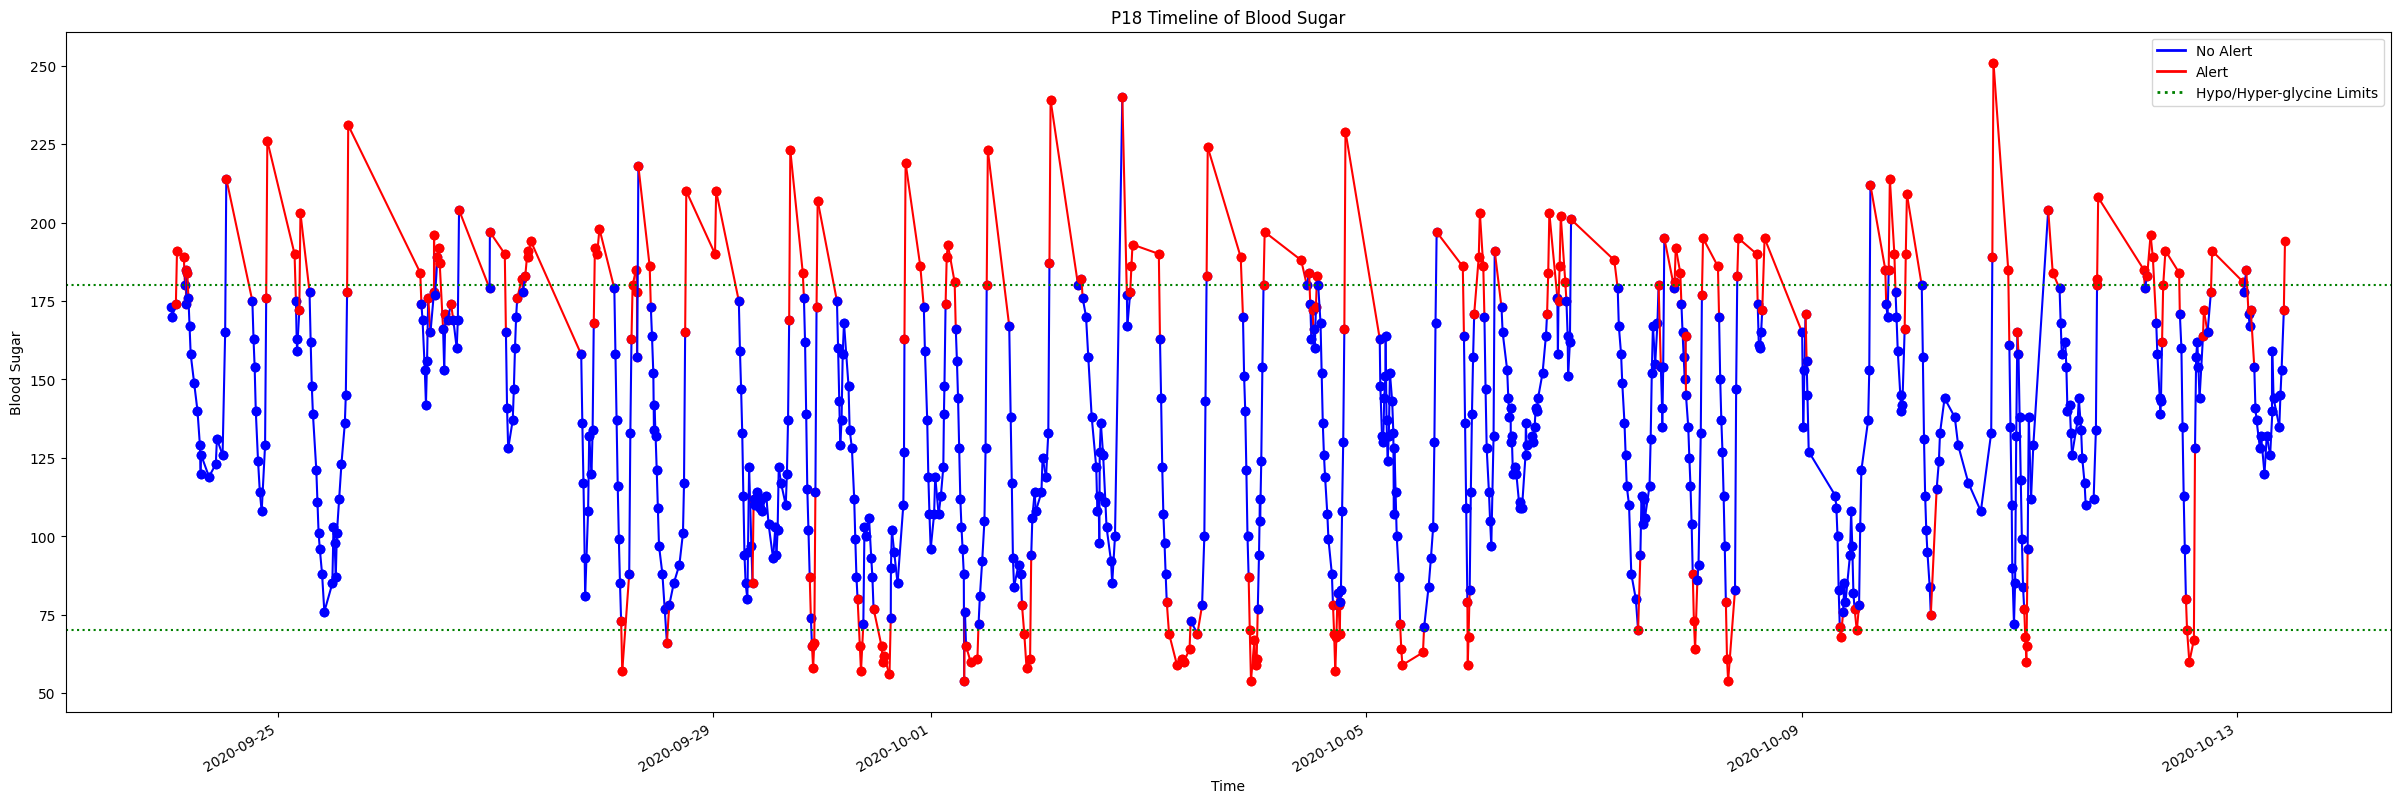

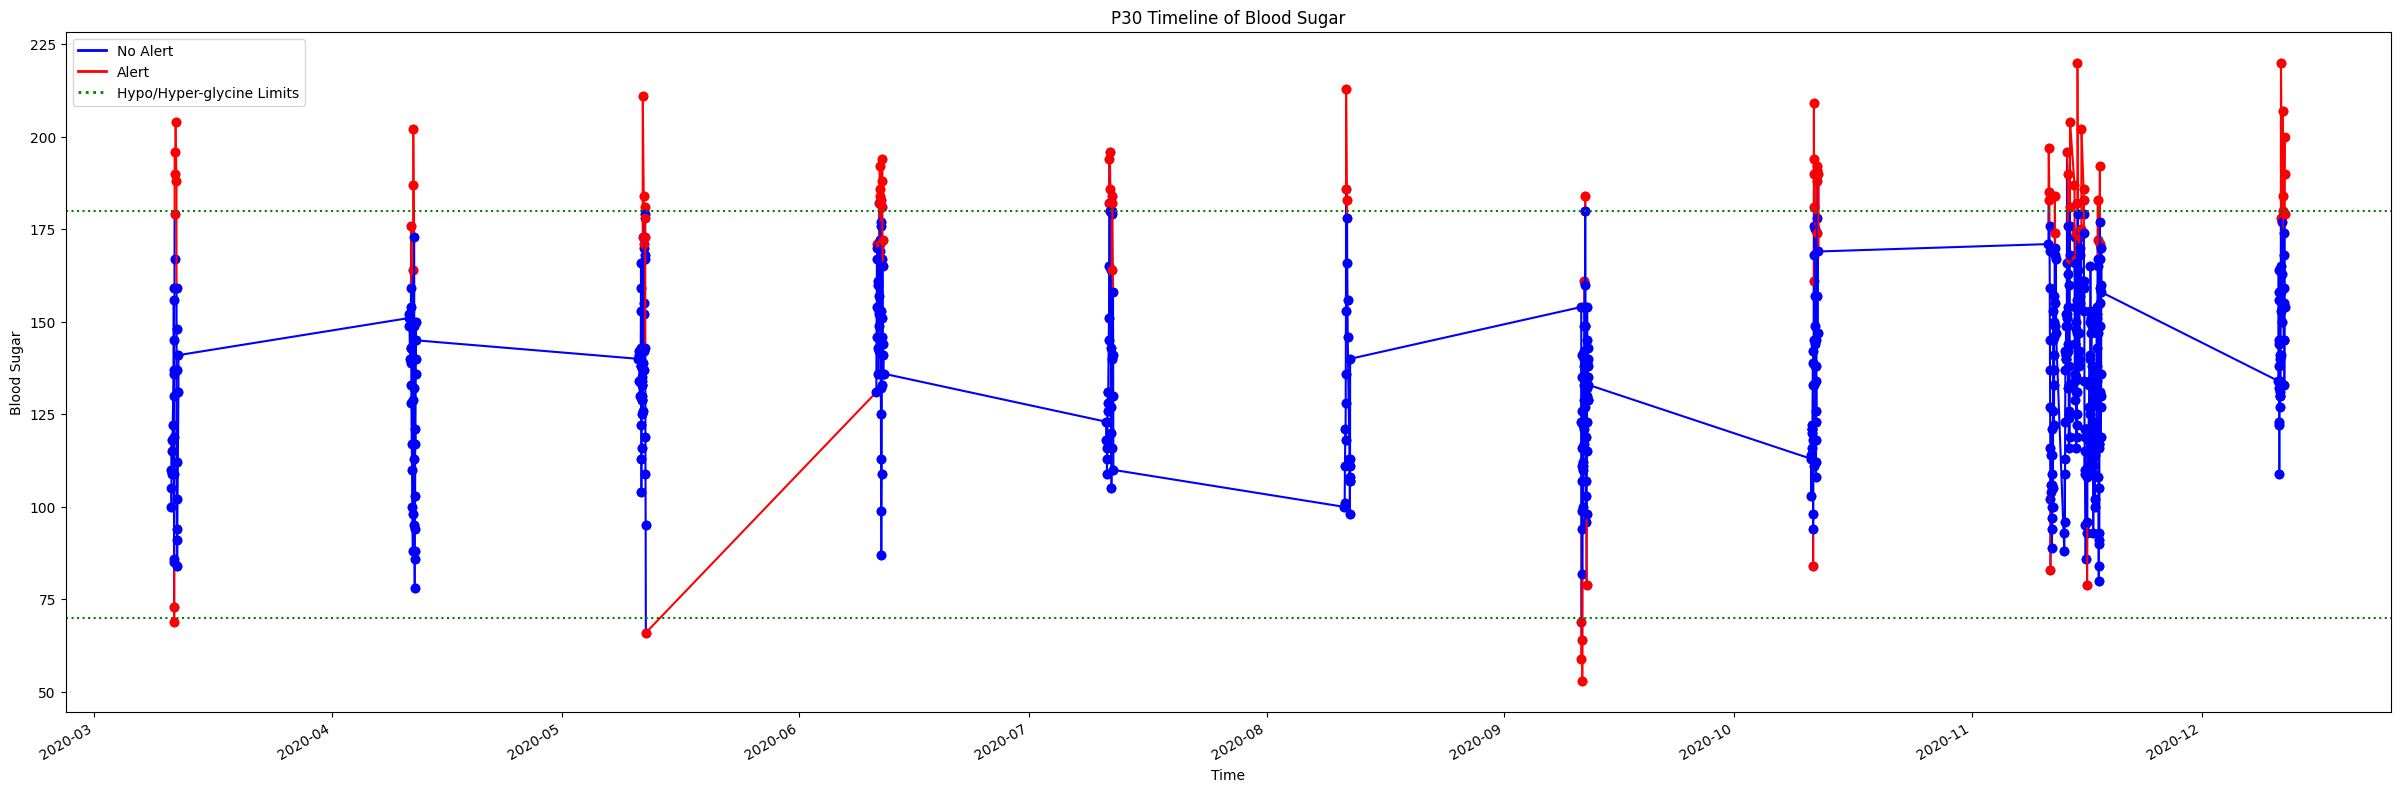

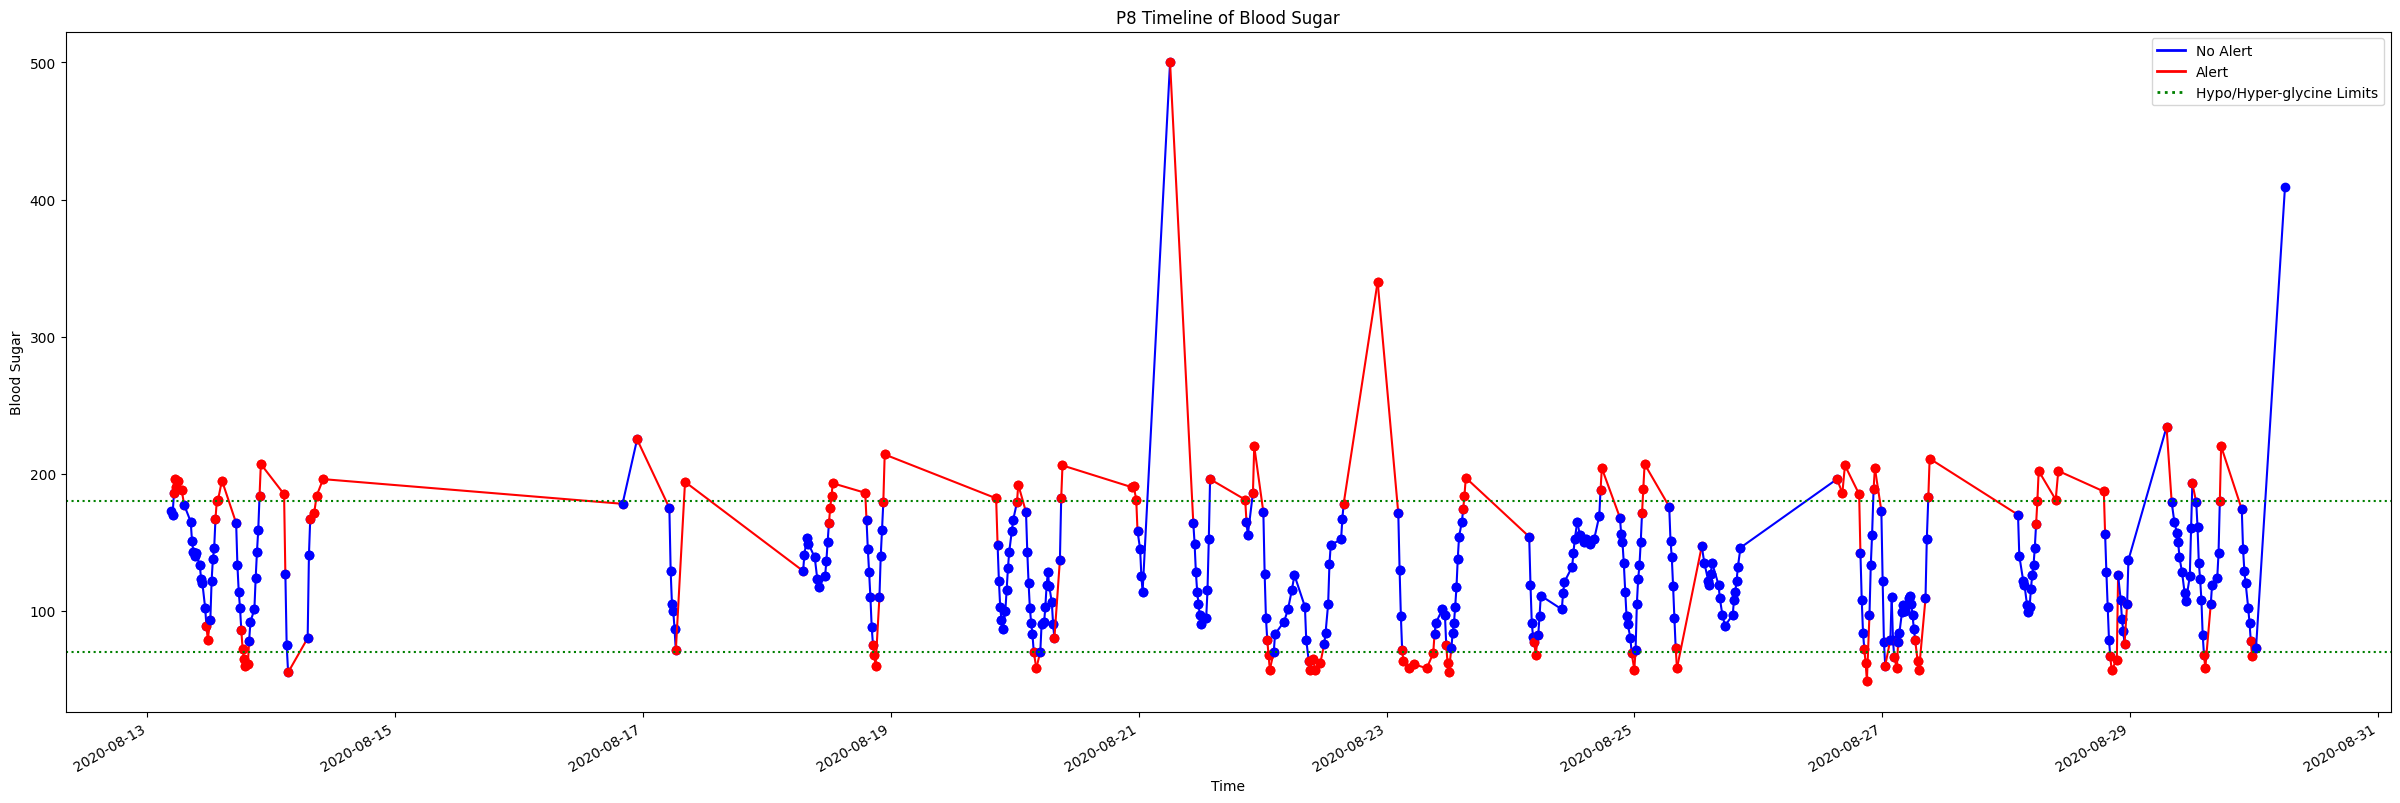

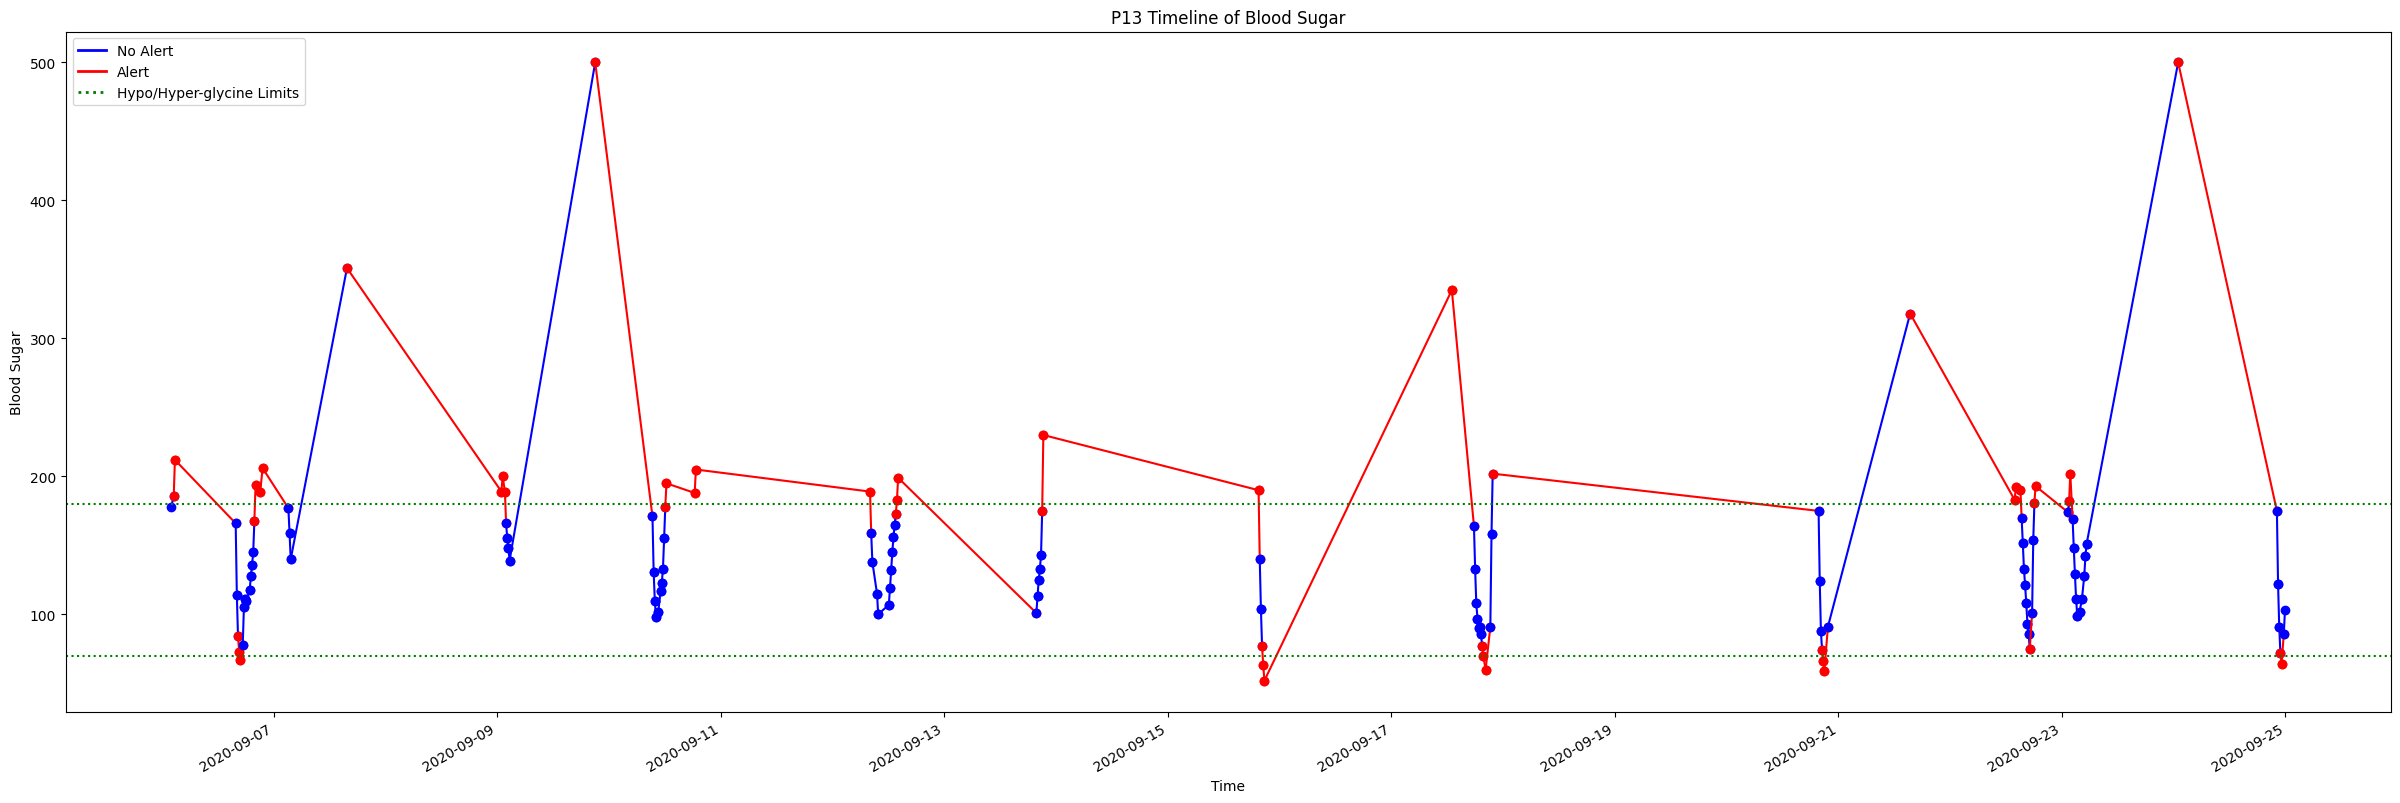

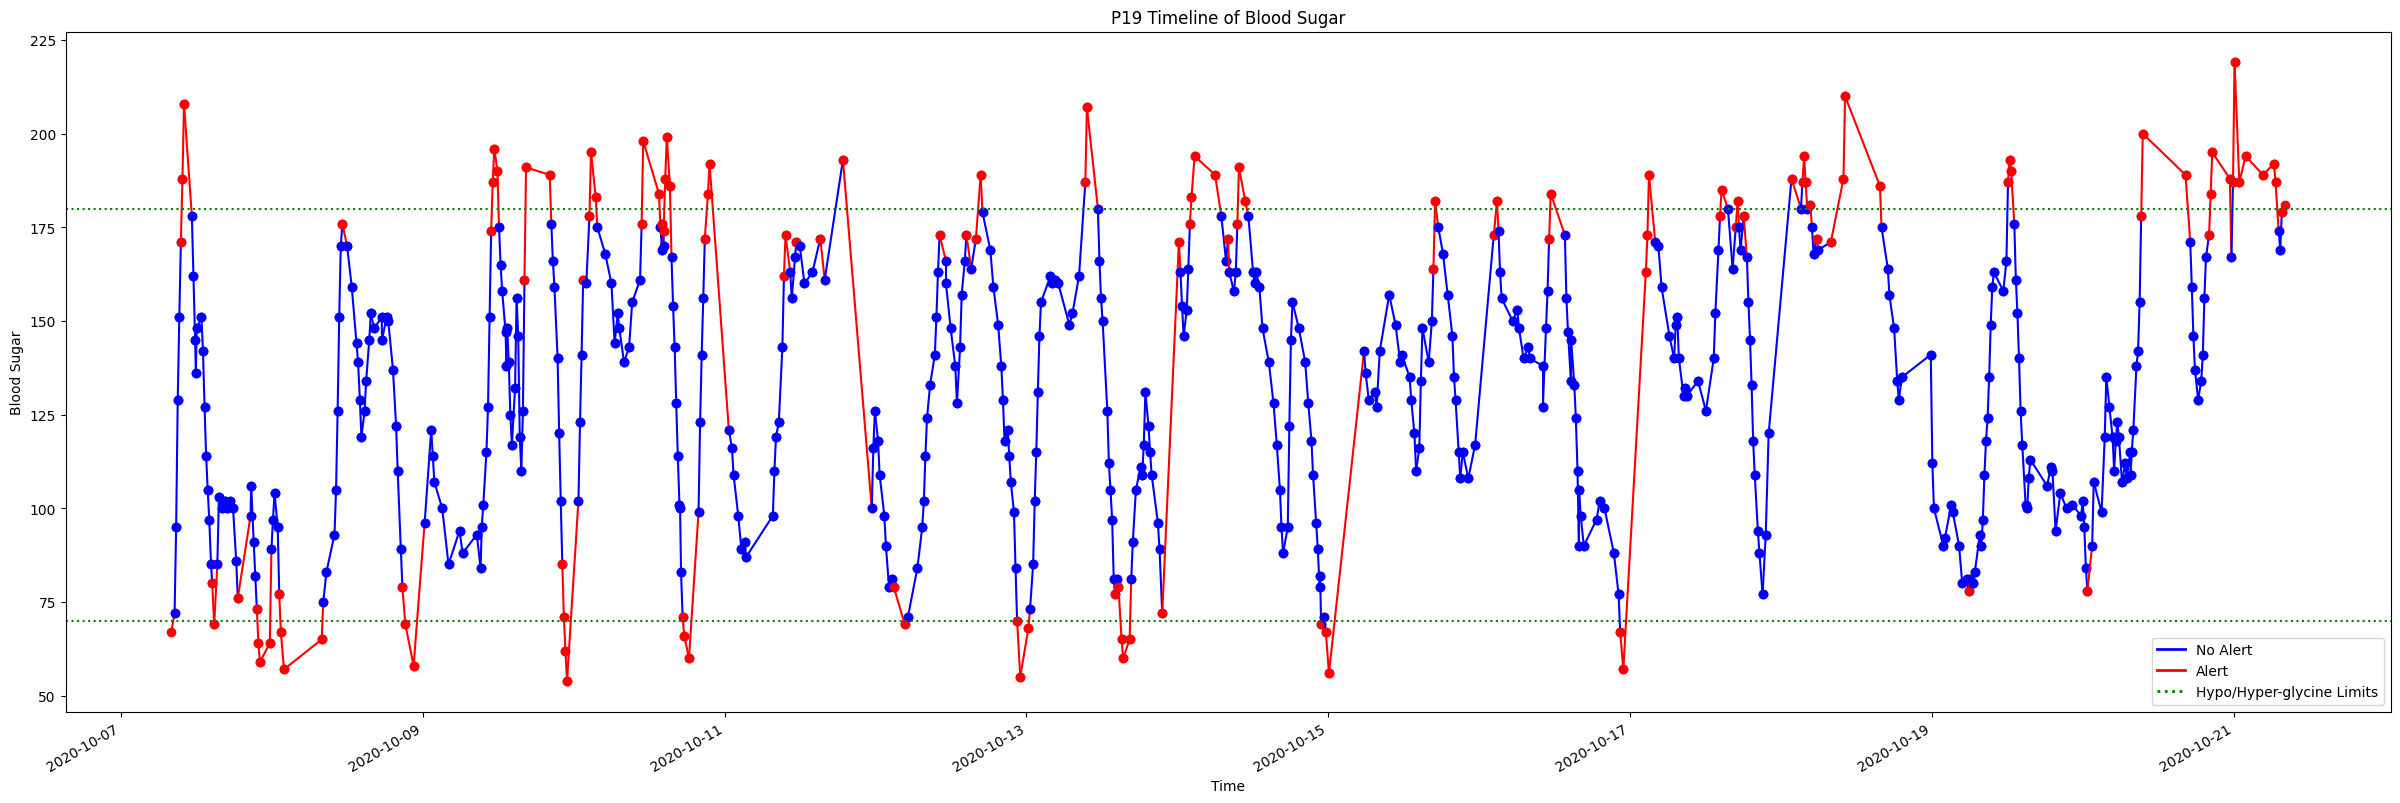

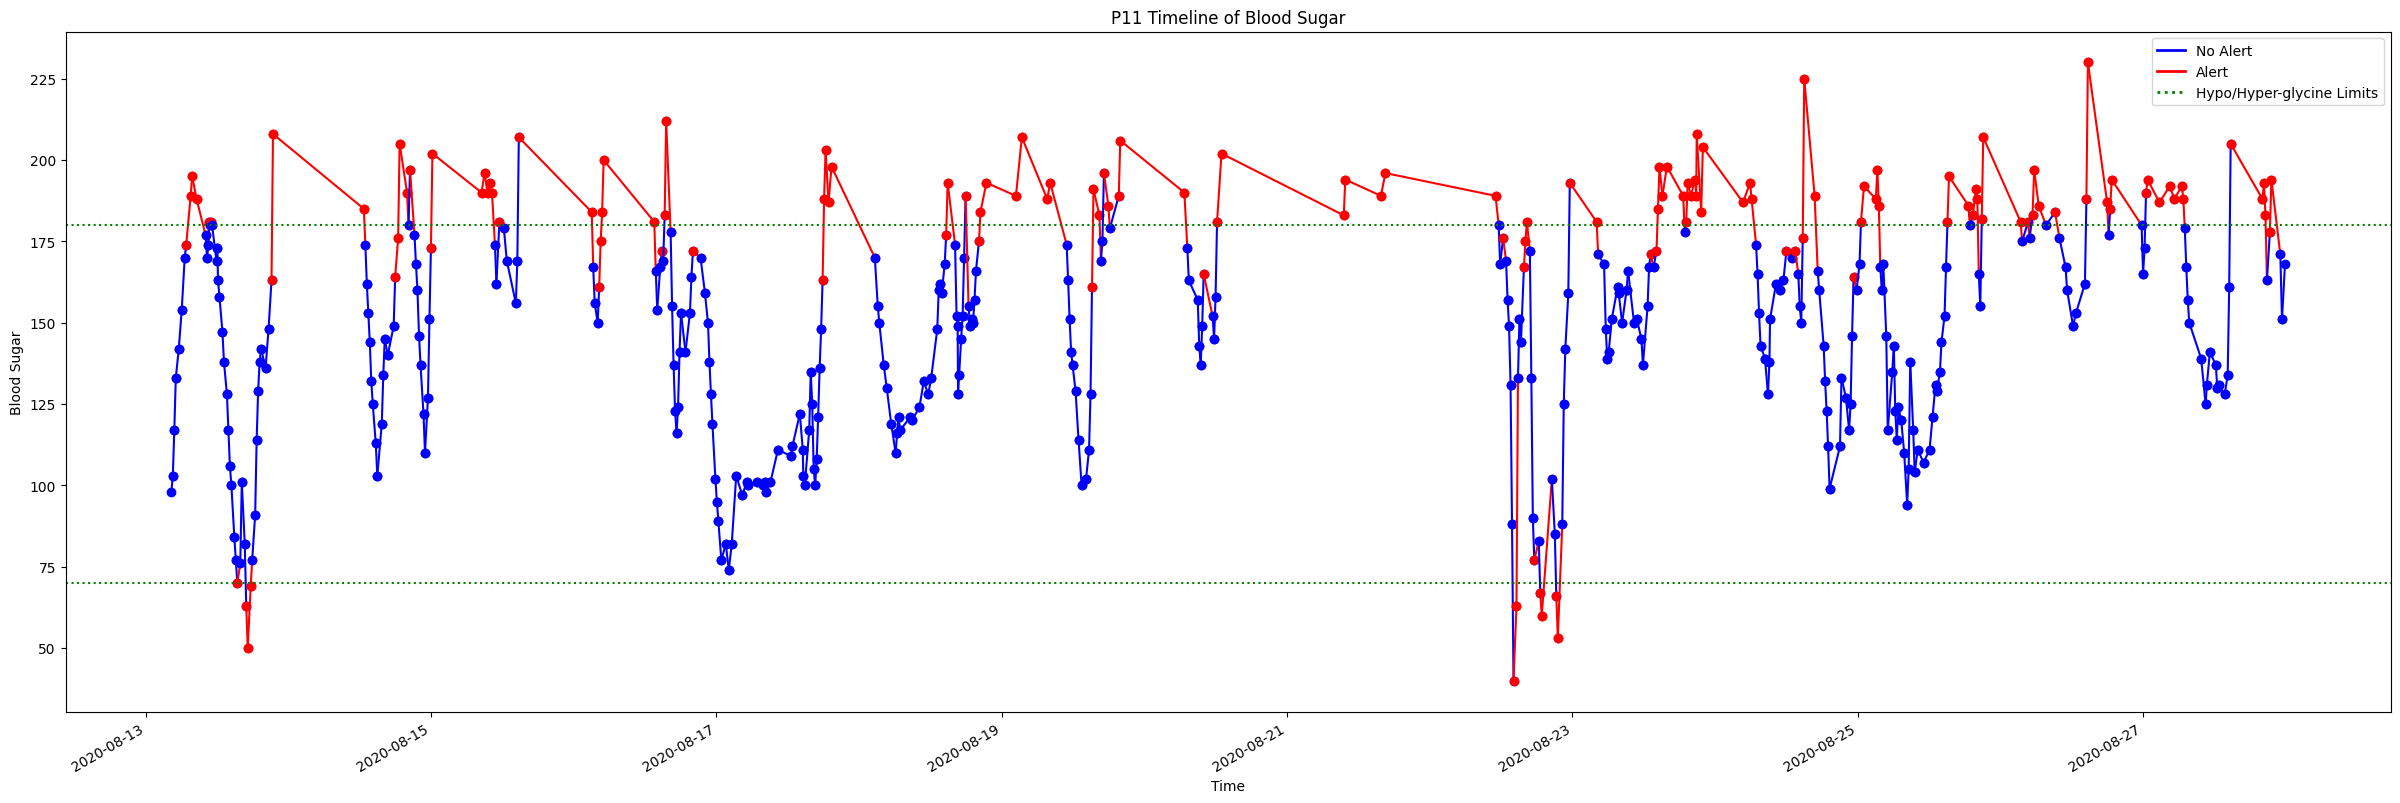

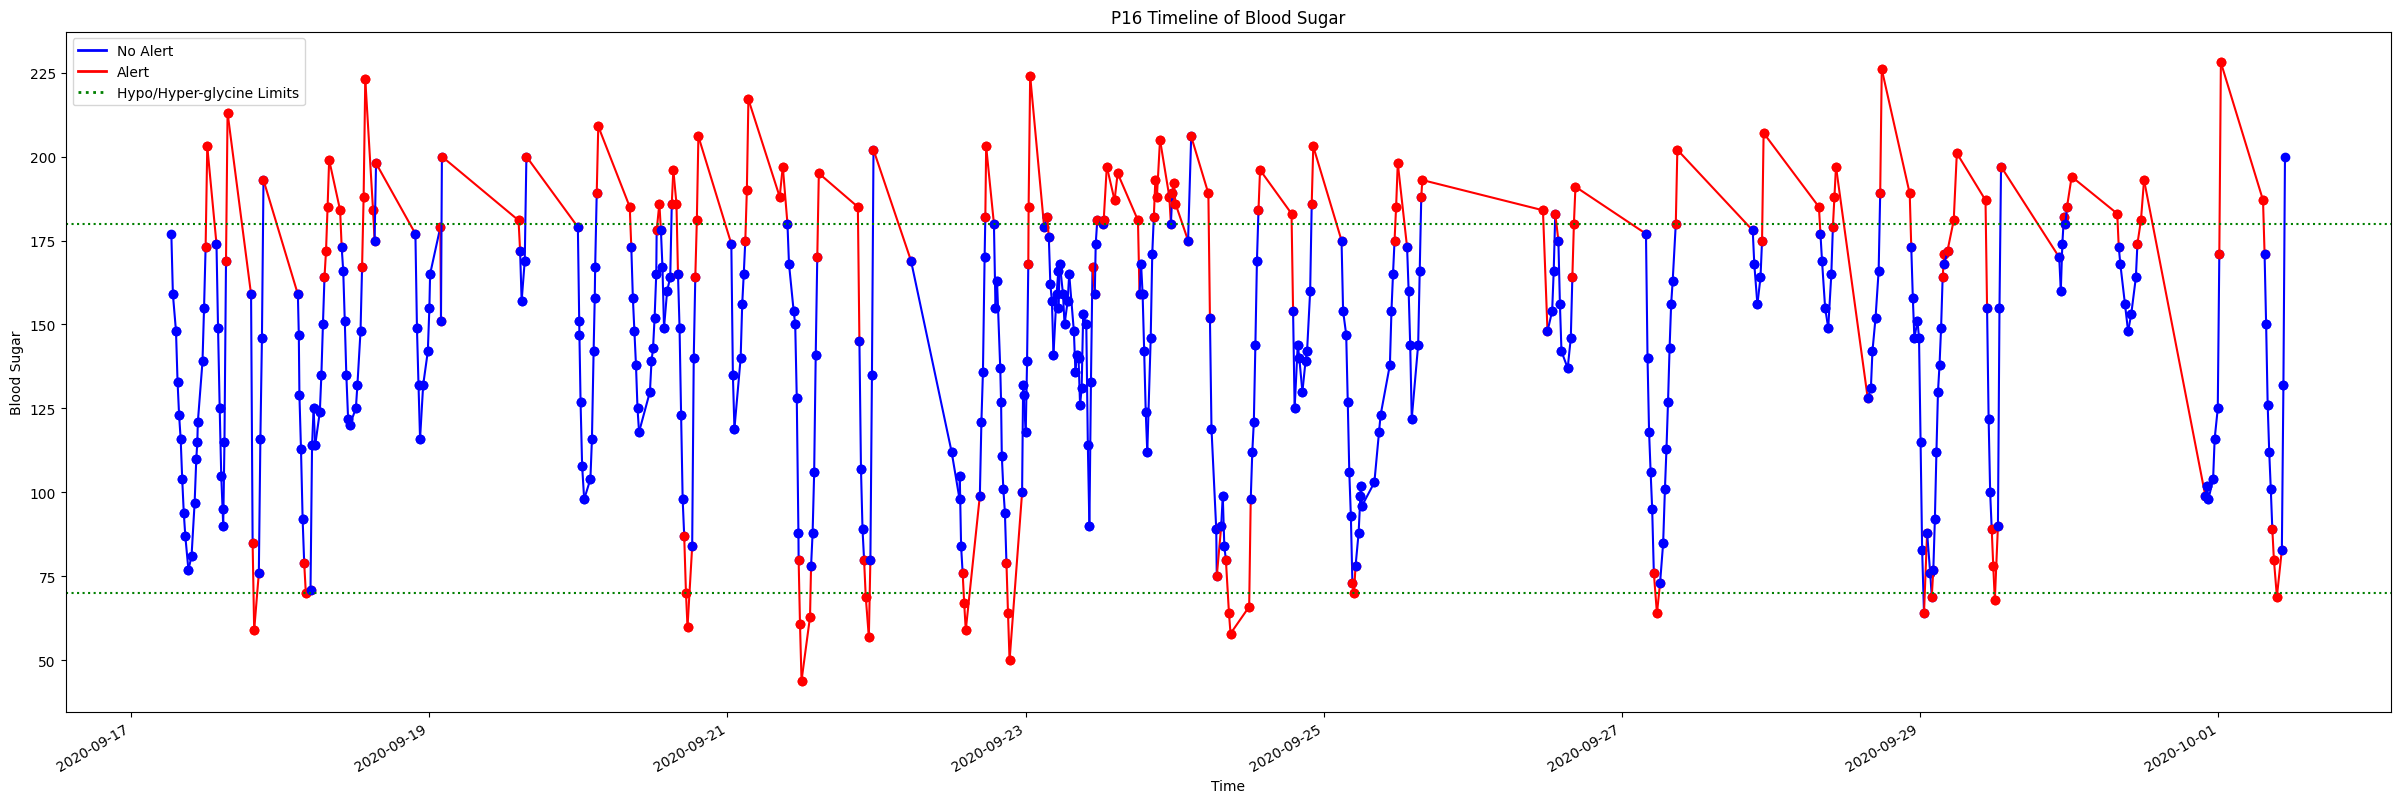

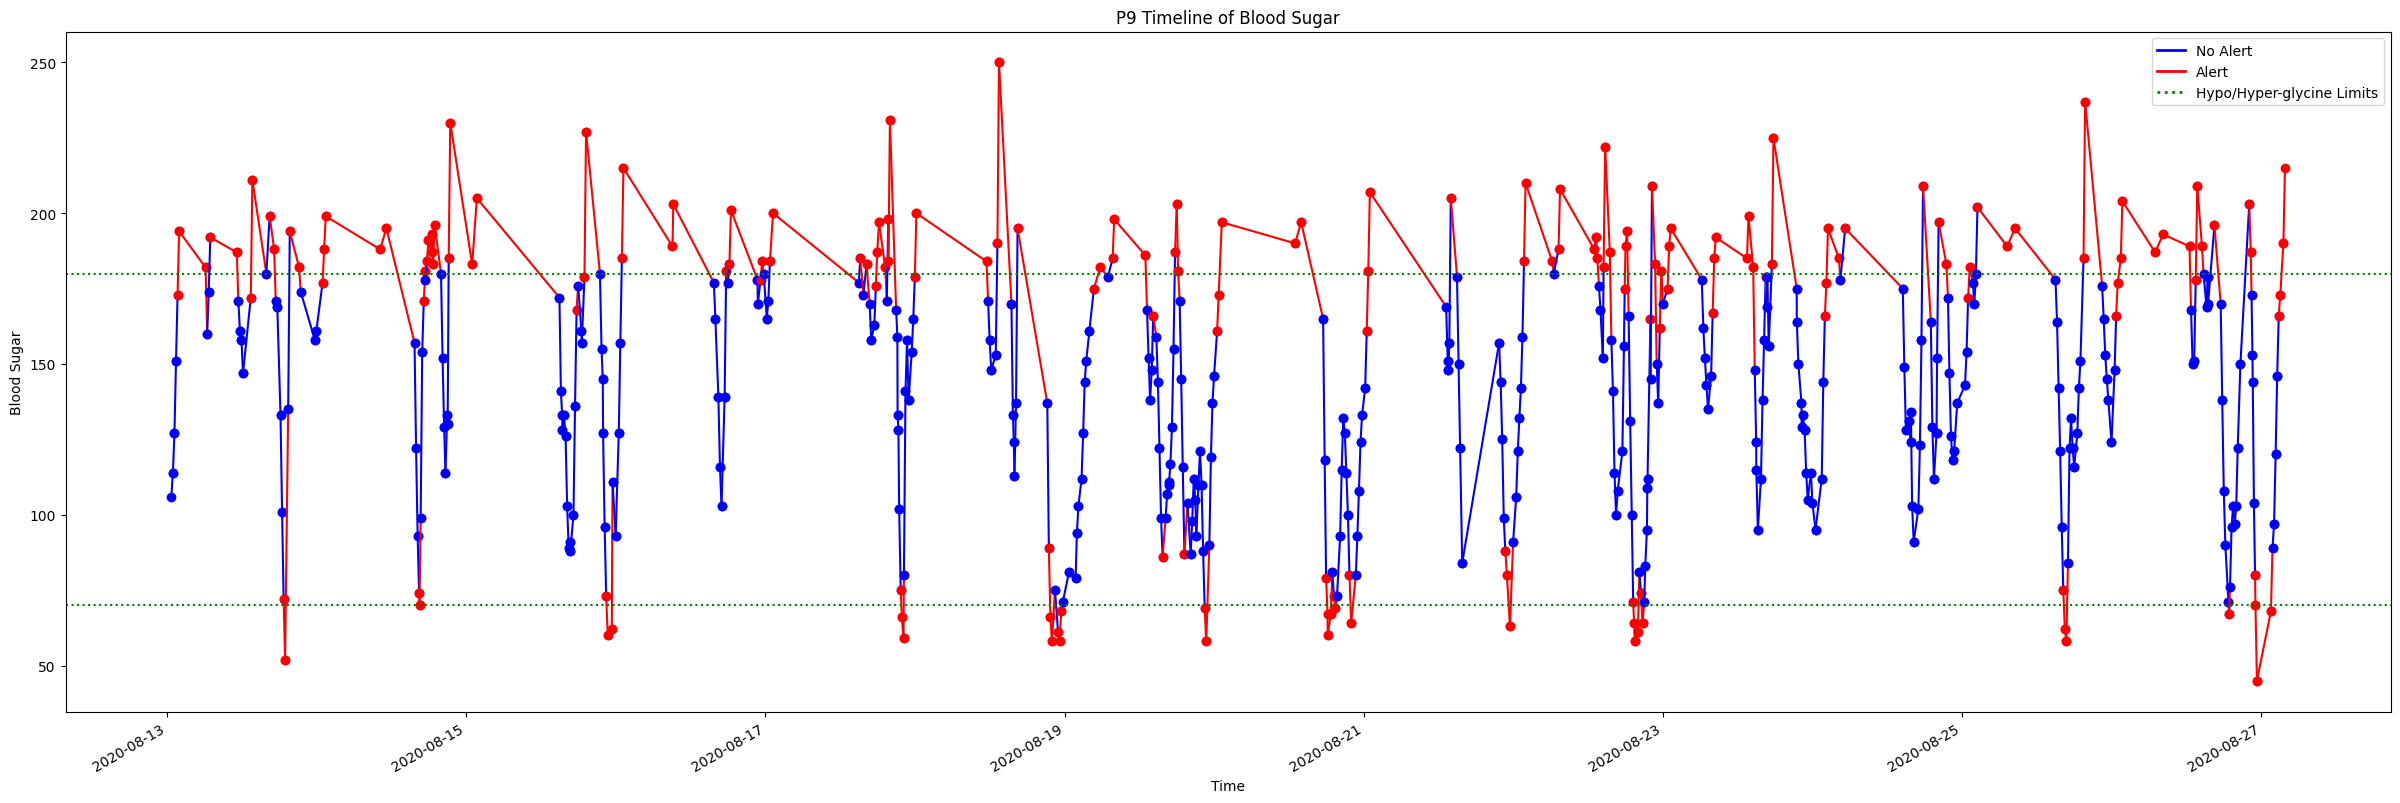

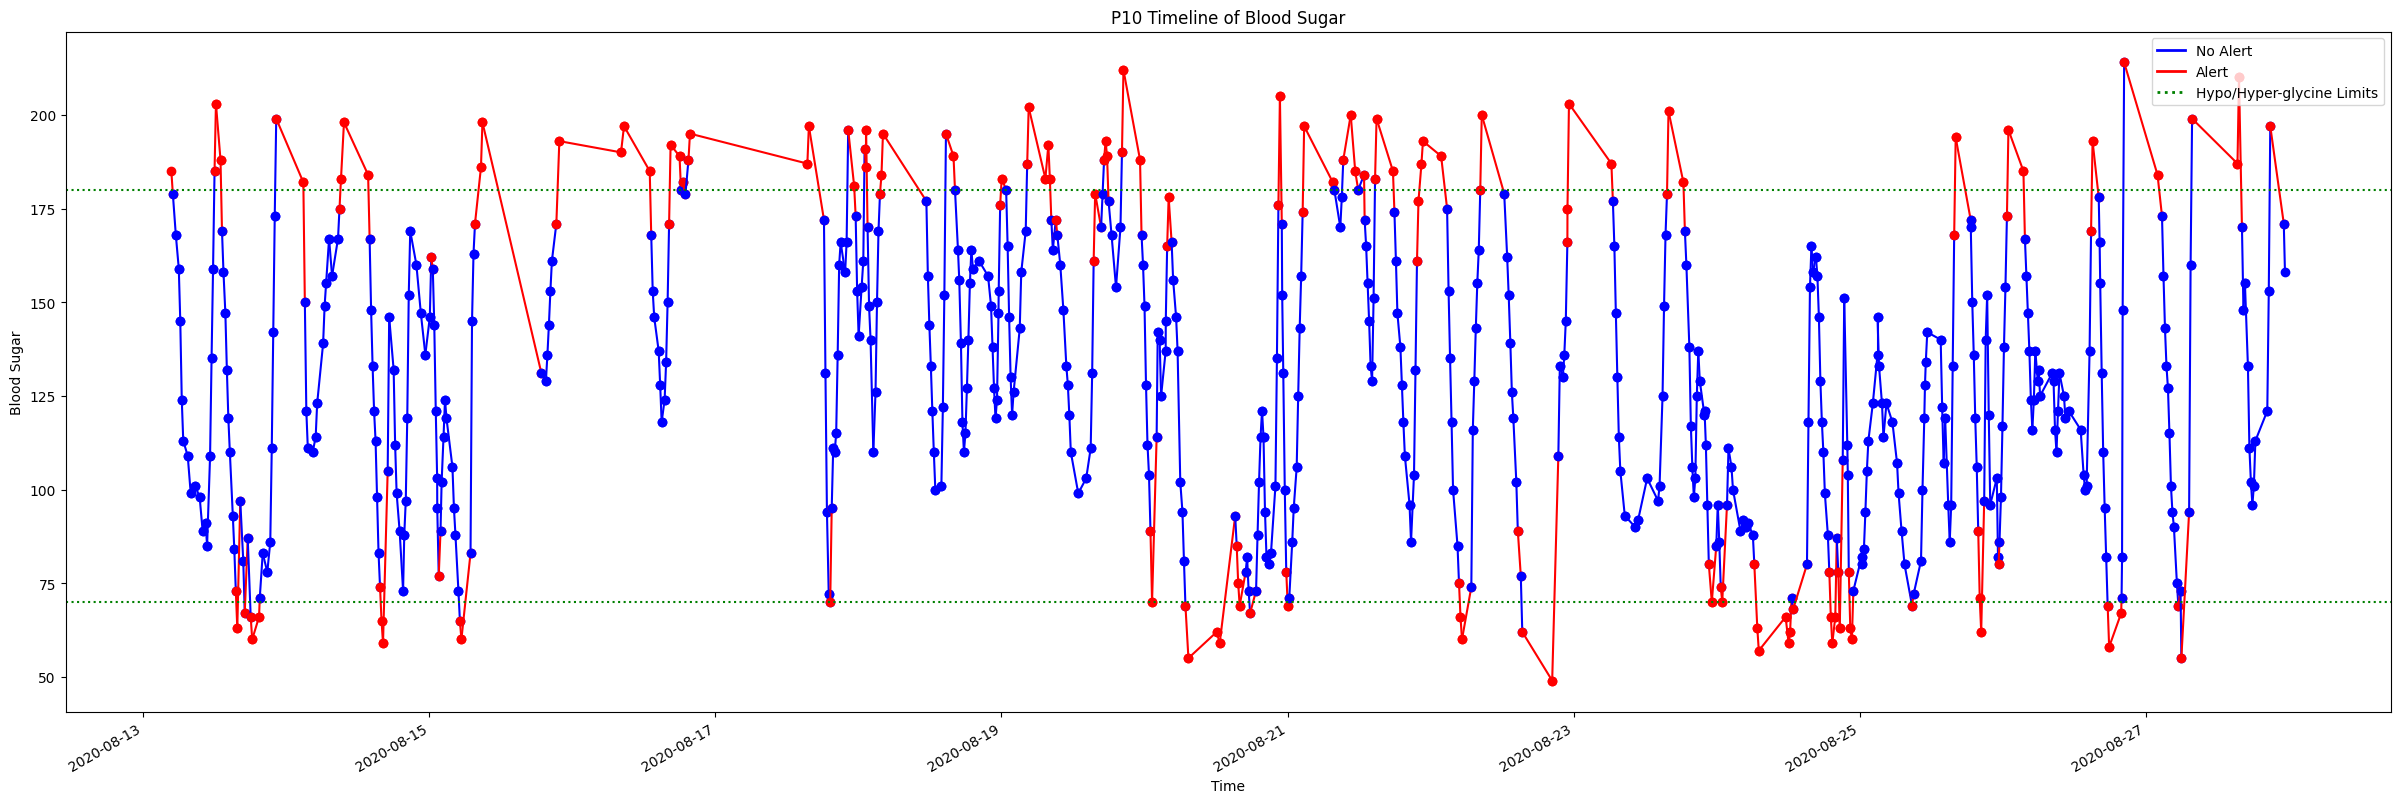

In [8]:
from utils.VisualizationUtils import draw_timeline
from utils.PropertyNames import ColumnNames as Cols

from Benchmark import add_alerts

naive_threshold = 20
params = {
    "k": 4,
    "risky_chars": None,
    "risk_threshold": 0.5,
    "prune": True,
    "prune_method": Opts.filter,
    "prune_threshold": 3,
    "max_steps": 3,
}

# Pick an alert model here
alert_to_plot = Cols.combined_alert

patient_data_with_alerts = add_alerts(patient_data, naive_threshold, **params)

for p in patients:
        draw_timeline(patient_data_with_alerts[patient_data_with_alerts[Cols.patient] == p].sort_values(Cols.date, ascending=True), p, alert_to_plot)